## Este notebook apresenta uma comparação entre os métodos de Euler e Runge-Kutta aplicados aos Modelos de Malthus, Verhulst e Gompertz



#### Modelo de Malthus





O modelo de Malthus, proposto por Thomas Robert Malthus no final do século XVIII, é uma representação simples e idealizada do crescimento populacional. Ele considera que a taxa de crescimento de uma população é diretamente proporcional a quantidade de indivíduos existentes na população.

A equação diferencial que descreve o Modelo de Malthus é:

$\frac{dx}{dt} = \lambda x$,

onde:

$x$ → tamanho da população

$t$ → tempo

$\lambda$ → constante de crescimento.


Esse modelo implica em um crescimento exponencial, onde a população aumenta sem limites ao longo do tempo, desde que a taxa de crescimento seja positiva.





#### Modelo de Verhulst





O modelo de Verhulst, também conhecido como modelo logístico, foi proposto por Pierre-François Verhulst no século XIX. Ele introduziu a ideia de que o crescimento populacional não pode continuar indefinidamente e é limitado pelos recursos disponíveis no ambiente. O modelo logístico leva em consideração a capacidade de suporte do ambiente, ou seja, a capacidade máxima que o ambiente pode sustentar.

A equação diferencial que descreve o Modelo de Verhulst é:

$\frac{dx}{dt} = \lambda x(1 - \frac{x}{K})$,

onde:

$K$ → capacidade de suporte.

O termo $(1 - \frac{x}{K})$ no modelo de Verhulst representa a redução da taxa de crescimento à medida que a população se aproxima da capacidade de suporte.





#### Modelo de Gompertz





O modelo de Gompertz, proposto por Benjamin Gompertz no início do século XIX, também leva em consideração o limite de recursos do ambiente, como o modelo de Verhulst. No entanto, o modelo de Gompertz incorpora uma taxa de crescimento que diminui de forma exponencial à medida que a população aumenta.

A equação diferencial que descreve o Modelo de Gompertz é:

$\frac{dx}{dt} = \lambda xln(\frac{1}{x})$.

O modelo de Gompertz é usado para descrever o crescimento populacional em situações na qual ocorre um rápido crescimento inicial, seguido por uma desaceleração gradual até que a população atinja um limite estacionário.





#### Método de Runge_Kutta





O método de Runge-Kutta é um método numérico utilizado para resolver equações diferenciais ordinárias (EDOs). Assim como outros métodos numéricos analisados, ele é utilizado para resolver EDOs que não possuem solução analítica ou quando a solução analítica é difícil ou impossível de ser obtida.

O método de Runge-Kutta envolve a aproximação da solução de uma EDO por meio de uma série de iterações. Ele utiliza informações sobre a taxa de variação da função ao longo do intervalo definido para estimar o próximo valor da solução.

Existem diferentes variantes do método de Runge-Kutta, como o método de Runge-Kutta de quarta ordem.

Esse método consiste em dividir o intervalo de tempo em segmentos menores (passos) e calcular a taxa de variação da função em vários pontos dentro de cada segmento. Em seguida, essas taxas de variação são combinadas ponderadamente para obter uma estimativa mais precisa do próximo valor da solução.

A definição generalizada do método de Runge-Kutta de quarta ordem para uma EDO de primeira ordem é:

$x_{n+1} = x_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$

Em que:

$k_1 = f(t_n, x_n)$ é a inclinação no início do intervalo

$k_2 = f(t_n+\frac{h}{2}, x_n+\frac{h}{2}k_1)$ é a inclinação no ponto médio do intervalo, obtida pelo método de Euler com relação à $k_1$

$k_3 = f(t_n+\frac{h}{2}, x_n+\frac{h}{2}k_2)$ é a inclinação no ponto médio do intervalo com relação à $k_2$

$k_4 = f(t_n + h, x_n + hk_3)$ é a inclinação no final do intervalo, determinado a partir de $k_3$

Sendo que $x$ representa o valor atual da solução num determinado tempo ($t$), $h$ é o tamanho do passo no tempo, $f$ é a função que descreve a taxa de variação da solução e $k_1$, $k_2$, $k_3$ e $k_4$ são os coeficientes que representam as taxas de variação calculadas em diferentes pontos, ou seja, as inclinações

O método de Runge-Kutta de quarta ordem é iterativo, ou seja, ele calcula a solução passo a passo, atualizando o valor da solução em cada iteração. Essas iterações são repetidas até que o intervalo de tempo estabelecido seja alcançado.



In [1]:
# Importações

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definição das funções para os modelos Malthus, Verhulst e Gompertz

def malthus(x, t, lamb):
    return lamb * x

def verhulst(x, t, lamb):
    return lamb * x * (1 - x / K)

def gompertz(x, t, lamb, K):
    return lamb * x * np.log(K / x)

In [3]:
# Função definida para o Método de Runge-Kutta

def runge_kutta(f, x0, t0, tf, h, *args):
    t = np.arange(t0, tf + h, h)
    n = len(t)
    x = np.zeros(n)
    x[0] = x0

    for i in range(1, n):    
        k1 = f(x[i - 1], t[i - 1], *args)
        k2 = h * f(x[i - 1] + 0.5 * k1, t[i - 1] + 0.5 * h, *args)
        k3 = h * f(x[i - 1] + 0.5 * k2, t[i - 1] + 0.5 * h, *args)
        k4 = h * f(x[i - 1] + k3, t[i - 1] + h, *args)
        x[i] = x[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    for i in range(1, n):
        n = f(x[i], t[i], *args)

    return t, x, n

In [4]:
# Função definida para o Método de Euler

def euler(f, x0, t0, tf, h, *args):
    t = np.arange(t0, tf + h, h)
    n = len(t)
    x = np.zeros(n)
    x[0] = x0

    for i in range(1, n):
        x[i] = x[i - 1] + h * f(x[i - 1], t[i - 1], *args)

    return t, x

In [5]:
# Variáveis

x0 = 0.5
t0 = 0
tf = 10
h = 1
lamb = 0.1
K = 1

In [6]:
# Atribuição das funções à variáveis para gerar os gráficosanalitica

t_malthus_rk, x_malthus_rk = np.arange(t0, tf+h, h), runge_kutta(malthus, x0, t0, tf, h, lamb)[1]
t_verhulst_rk, x_verhulst_rk = np.arange(t0, tf+h, h), runge_kutta(verhulst, x0, t0, tf, h, lamb)[1]
t_gompertz_rk, x_gompertz_rk = np.arange(t0, tf+h, h), runge_kutta(gompertz, x0, t0, tf, h, lamb, K)[1]

t_malthus_e, x_malthus_e = np.arange(t0, tf+h, h), euler(malthus, x0, t0, tf, h, lamb)[1]
t_verhulst_e, x_verhulst_e = np.arange(t0, tf+h, h), euler(verhulst, x0, t0, tf, h, lamb)[1]
t_gompertz_e, x_gompertz_e = np.arange(t0, tf+h, h), euler(gompertz, x0, t0, tf, h, lamb, K)[1]

t_analitica = np.arange(t0, tf+h, h)
x_analitica_malthus = x0 * np.exp(lamb * t_analitica)
x_analitica_verhulst = K/(1+np.exp(-lamb*t_analitica)*((K-x0)/x0))
x_analitica_gompertz = K*np.exp(-np.log(K/x0)*np.exp(-lamb*t_analitica))

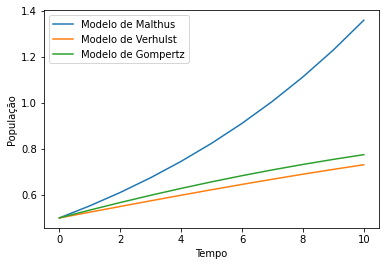

In [7]:
# Gráfico apresentando a comparação entre o comportamento das soluções analíticas para os três modelos 

plt.plot(t_analitica, x_analitica_malthus, label='Modelo de Malthus')
plt.plot(t_analitica, x_analitica_verhulst, label='Modelo de Verhulst')
plt.plot(t_analitica, x_analitica_gompertz, label='Modelo de Gompertz')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.legend()

O erro absoluto máximo para o Modelo de Malthus no intervalo definido é: 
 Método de Runge-Kutta: 1.0421619396350223e-06 
 Método de Euler: 0.0622696841795225


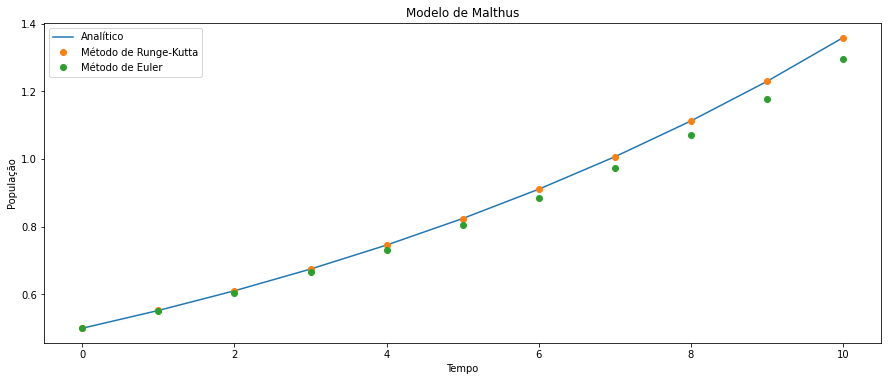

In [8]:
# Malthus

plt.figure(figsize=(15, 20))
plt.subplot(311)
plt.plot(t_analitica, x_analitica_malthus, label='Analítico')
plt.plot(t_malthus_rk, x_malthus_rk, 'o', label='Método de Runge-Kutta')
plt.plot(t_malthus_e, x_malthus_e, 'o', label='Método de Euler')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo de Malthus')
plt.legend()

erro_rk = abs(x_analitica_malthus[-1] - x_malthus_rk[-1])
erro_e = abs(x_analitica_malthus[-1] - x_malthus_e[-1])
print('O erro absoluto máximo para o Modelo de Malthus no intervalo definido é: \n', 'Método de Runge-Kutta:', erro_rk, '\n Método de Euler:', erro_e)

O erro absoluto máximo para o Modelo de Verhulst no intervalo definido é: 
 Método de Runge-Kutta: 1.8491594477865192e-08 
 Método de Euler: 0.0023444372280004844


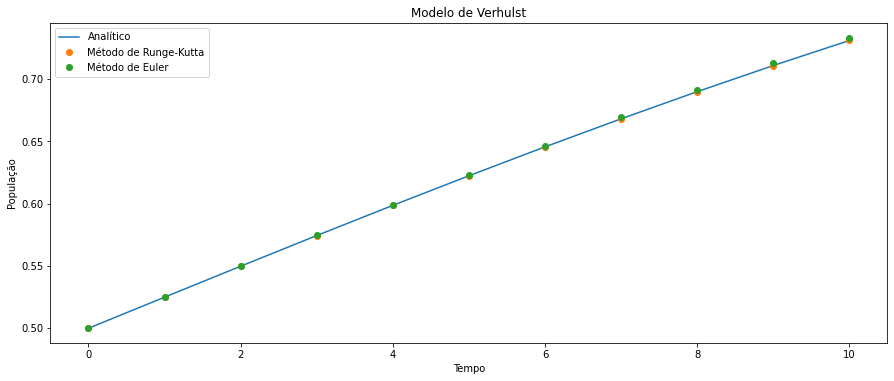

In [9]:
# Verhulst

plt.figure(figsize=(15, 20))
plt.subplot(311)
plt.plot(t_analitica, x_analitica_verhulst, label='Analítico')
plt.plot(t_verhulst_rk, x_verhulst_rk, 'o', label='Método de Runge-Kutta')
plt.plot(t_verhulst_e, x_verhulst_e, 'o', label='Método de Euler')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo de Verhulst')
plt.legend()

erro_rk = abs(x_analitica_verhulst[-1] - x_verhulst_rk[-1])
erro_e = abs(x_analitica_verhulst[-1] - x_verhulst_e[-1])
print('O erro absoluto máximo para o Modelo de Verhulst no intervalo definido é: \n', 'Método de Runge-Kutta:', erro_rk, '\n Método de Euler:', erro_e)

O erro absoluto máximo para o Modelo de Gompertz no intervalo definido é: 
 Método de Runge-Kutta: 6.610227964998217e-08 
 Método de Euler: 0.0056858568544532195


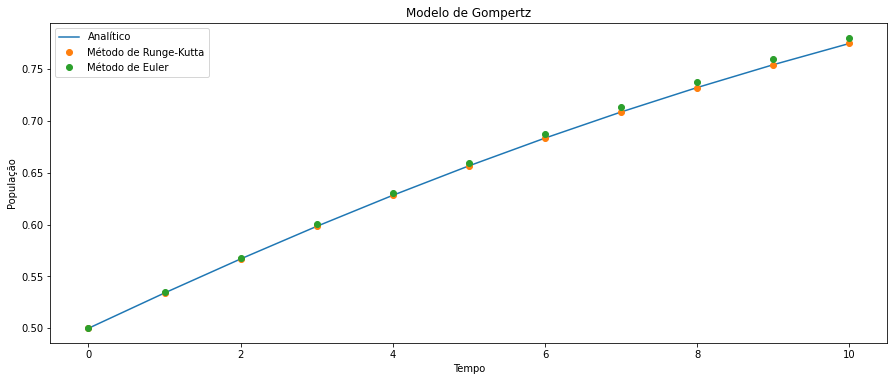

In [10]:
# Gompertz

plt.figure(figsize=(15, 20))
plt.subplot(311)
plt.plot(t_analitica, x_analitica_gompertz, label='Analítico')
plt.plot(t_gompertz_rk, x_gompertz_rk, 'o', label='Método de Runge-Kutta')
plt.plot(t_gompertz_e, x_gompertz_e, 'o', label='Método de Euler')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('Modelo de Gompertz')
plt.legend()

erro_rk = abs(x_analitica_gompertz[-1] - x_gompertz_rk[-1])
erro_e = abs(x_analitica_gompertz[-1] - x_gompertz_e[-1])
print('O erro absoluto máximo para o Modelo de Gompertz no intervalo definido é: \n', 'Método de Runge-Kutta:', erro_rk, '\n Método de Euler:', erro_e)

Conforme constatado, o método de Runge-Kutta apresenta uma solução numérica melhor que o método de Euler e a principal diferença entre os dois métodos está na maneira como o valor da próxima solução é estimado.

O método de Euler utiliza uma abordagem de primeira ordem para se aproximar da solução de uma equação diferencial, o que significa que ele faz uma estimativa linear da taxa de variação da função em um determinado ponto. O método considera que essa taxa de variação é constante em todo o intervalo e usa essa estimativa para calcular o próximo valor da solução. No entanto, essa aproximação linear pode levar a erros significativos, ainda mais quando a função tem um comportamento não linear ou quando o passo de integração é grande.

Por outro lado, o método de Runge-Kutta é um método de ordem superior, o que significa que ele leva em consideração as informações adicionais sobre a taxa de variação da função em diversos pontos do intervalo. O método utiliza uma média ponderada dessas informações para obter uma estimativa mais precisa do próximo valor da solução.

Neste algoritmo foi aplicado o método de Runge-Kutta de quarta ordem que utiliza quatro estimativas da taxa de variação da função em diferentes pontos do intervalo para calcular o próximo valor da solução. Isso resulta em uma aproximação mais precisa, reduzindo os erros de aproximação associados ao método de Euler.

Portanto, o método de Runge-Kutta é mais preciso porque leva em consideração informações adicionais sobre a taxa de variação da função em diversos pontos do intervalo, enquanto o método de Euler faz uma estimativa linear simples. No entanto, o método de Runge-Kutta demanda mais recurso computacional para determinar os pontos de inclinação($k$), sua precisão também depende de outros fatores, como o tamanho do passo de integração, e a natureza da EDO estudada, pois se a equação diferencial apresentar um comportamento não linear acentuado ou singularidades, pode haver maior dificuldade em se aproximar com precisão.